# Predicting the Prices of Used Electric Vehicles #

**Introduction**

In recent years, the automotive industry has been defined by a sense of inevitability. The advent of electric vehicles (EV's) has offered the option of eco-friendly transportation, allowing people to save the planet in addition to their gas money while they travel. The demand for EV’s and hybrids will only continue to increase, and the automotive industry will adapt in response. In the context of a market that is rapidly evolving, how can we use statistics and data science to predict the price of an electric vehicle? 

**Objective**

The purpose of this investigation is to create a statistical model that will help us estimate the price of a pre-owned Tesla vehicle based on mileage. 

**Methods**

*Sampling Methods*:

The population of interest in this study are used Tesla vehicles. Specifically, the observational unit in this study are various Model 3 Tesla’s of various types. A random sample of 50 Model 3 Tesla’s were obtained online from CarMax, an automotive retailer of used cars. The 50 vehicles were selected randomly to ensure a reliable representation of the general population of used Tesla vehicles. All the data found was available on the CarMax website. To put together a dataset for this investigation, the data was recorded on an excel spreadsheet, each vehicle labeled by various variables.


    
*Study Methods*:

The variables recorded for each car were as follows: price, mileage, year, model, and color. These variables were chosen because price is the primary element that is being investigated in this study, and mileage, year, model, and color are common factors that affect the price of an automobile. As such, the response variable is the price of a used Tesla, while the explanatory variables are mileage, year, model, and color. The Tesla model and color are categorical variables that can classify cars into distinct groups, while price, mileage, and year are quantitative variables that involve numerically measurable quantities of the vehicles. In this investigation, mileage is the main predictor variable to determine the price of a car. CarMax is a reliable retailer, but we will have to acknowledge that the data obtained from them is not a perfect representative of the population. There are limited listings and there may be some missing data. In the field of statistics, a larger sample size is always better and will provide a more accurate representation of the overall population. 


**Data Exploration**

In [47]:
import pandas as pd

def summary_statistics(df):
    # Check if the DataFrame is empty
    if df.empty:
        return None

    # Remove the "$" sign from the "Price" column and convert it to float
    df['Price'] = df['Price'].str.replace('$', '', regex=True).str.replace(',', '').astype(float)

    # Calculate summary statistics
    summary = df.describe()

    return summary

# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\leegu\Desktop\LACC\Stats Data Science\Used Car Investigation Report\Used_Car_graph.csv')

# Call the summary_statistics function and print the result
summary = summary_statistics(df)
print(summary)

              Price       Mileage        Year
count     50.000000     50.000000    50.00000
mean   35398.000000  33340.000000  2020.02000
std     4285.714286  16310.269708     1.68414
min    29998.000000   1000.000000  2018.00000
25%    31998.000000  21250.000000  2018.00000
50%    33998.000000  36000.000000  2020.00000
75%    37748.000000  47500.000000  2021.00000
max    46998.000000  60000.000000  2023.00000


Upon summarizing the dataset using Python, it was found that the response variable (price) has a mean of 35,398 and a median of 33,998. The median is a reliable measurement of the center of a dataset because it is not affected by extreme values, while the mean value is usually more sensitive to outliers. However, for this particular dataset in this study, there weren’t any extreme outliers. The min value of 29,998 and the max value of 46,998, and the interquartile range of 5750 (Q3 – Q1) indicate that this dataset is consistently distributed. Therefore, we can say that both the mean and the median are reliable representations of the center of thus dataset.

The explanatory variable (mileage) has a mean of 33,340 and a median of 36,000. The interquartile range is 26,250, while the maximum and minimum values are 60,000 and 1000 respectively. 

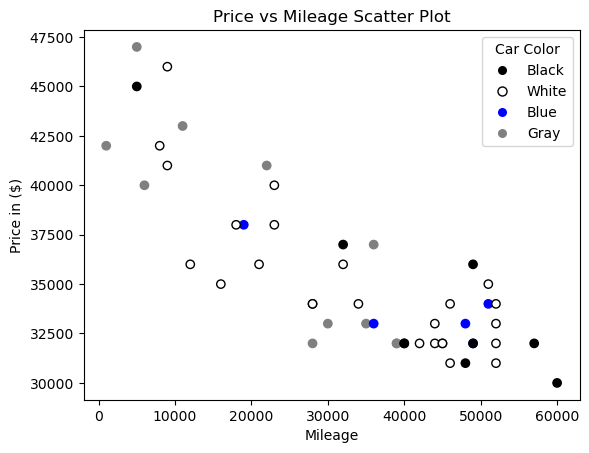

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\leegu\Desktop\LACC\Stats Data Science\Used Car Investigation Report\Used_Car_graph.csv')


# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '', regex=True).str.replace(',', '').astype(float)

# Replace 'nan' values in the 'Condition' column with a default color
df['Condition'] = df['Condition'].fillna('Unknown')

# Define a dictionary that maps condition values to colors
colors = {'Black': 'black', 'White': 'white', 'Blue': 'blue', 'Gray': 'gray'}

#Scatter plot color labels
legend_labels = [
    plt.Line2D([0], [0], marker='o', color='w', label=key, 
               markerfacecolor=value, markeredgecolor='black' if key == 'White' else 'none', markersize=6.5) 
    for key, value in colors.items()
]

plt.legend(handles=legend_labels, title='Car Color')

# Create a scatter plot of Price vs Mileage, with color based on the Condition
plt.scatter(df['Mileage'], df['Price'], c=df['Condition'].apply(lambda x: colors[x]), edgecolors=df['Condition'].apply(lambda x: 'black' if x == 'White' else colors[x]))
plt.xlabel('Mileage')
plt.ylabel('Price in ($)')
plt.title('Price vs Mileage Scatter Plot')
plt.show()

The data that is being presented in the scatterplot above illustrates the relationship between the price and mileage of the used Tesla vehicles. On the x-axis is the mileage of the car (explanatory variable), while the y-axis shows the corresponding price (response variable). The color of the vehicles is also shown, as each dot is colored according to each vehicle’s respective color. The main takeaway from this graph is the general linearity among all the data points and a strong negative correlation between the x and y-axis. It is clear that as x increases, y will decrease. In addition, even if we were to isolate all the vehicles according to their color, all the vehicles still share this same linearity and negative correlation. No matter what color, each vehicle will still decrease in value as its mileage increases. 

In [40]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\leegu\Desktop\LACC\Stats Data Science\Used Car Investigation Report\Used_Car_graph.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '', regex=True).str.replace(',', '').astype(float)

# Compute the correlation between Price and Mileage
correlation = df['Price'].corr(df['Mileage'])

print(f'Correlation between Price in ($) and Mileage: {correlation}')

Correlation between Price in ($) and Mileage: -0.8366916617987408


Furthermore, the correlation coefficient of this linear model comes out to r = -0.8367. This value denotes the direction and strength of the linear relationship between the mileage and the price of the vehicles. The negative sign indicates that the x and y-axis have a negative correlation, and the magnitude is very strong, as the value is quite close to -1. The correlation coefficient evidently matches the data that we see in the scatterplot. In the cell below, we can see the individual correlation of coefficients for the vehicles according to color. We can see the same pattern for each of the correlation values according to color.

In [15]:
# Define a dictionary that maps condition values to colors
colors = {'Black': 'k', 'White': 'k', 'Blue': 'k', 'Gray': 'k'}

# Compute correlation coefficients for each color
correlation_dict = {}
for color, hex_code in colors.items():
    color_df = df[df['Condition'] == color]
    correlation = color_df['Price'].corr(color_df['Mileage'])
    correlation_dict[color] = correlation

# Print correlation coefficients
for color, correlation in correlation_dict.items():
    print(f'Correlation between Price and Mileage for {color}: {correlation}')

Correlation between Price and Mileage for Black: -0.8936856845154206
Correlation between Price and Mileage for White: -0.8107524658196686
Correlation between Price and Mileage for Blue: -0.8415243088622519
Correlation between Price and Mileage for Gray: -0.8588087009247255


**Least-Squares Regression Line**

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\leegu\Desktop\LACC\Stats Data Science\Used Car Investigation Report\Used_Car_graph.csv')

# Remove the "$" sign and convert the "Price" column to float
df['Price'] = df['Price'].str.replace('$', '', regex=True).str.replace(',', '').astype(float)

# Extract the input (X) and output (y) variables
X = df[['Mileage']]  # Use only 'Mileage' as the predictor
y = df['Price']

# Create a LinearRegression model and fit it to the data
reg = LinearRegression().fit(X, y)

# Print the slope (regression coefficient) and y-intercept of the least squares line
print('Slope:', reg.coef_[0])
print('Y-intercept:', reg.intercept_)


Slope: -0.21985052803098068
Y-intercept: 42727.81660455289



This least squares regression line is the equation that summarizes our statistical model: 

price = -0.22(mileage) + 42727.82


The least squares regression line is the equation that summarizes our statistical model, which in our data comes out to be: price = -0.22(mileage) + 42727.82. The slope of the regression line is -0.22, meaning that for every mileage increase of 1 mile, the predicted price of the used Tesla will decrease by \\$0.22. This inference makes sense because both the slope and the correlation coefficient have a negative sign. It also goes in line with the trend we have seen so far of the price decreasing as mileage increases. The y-intercept in the regression line is 42727.82. What this means is that for a used Tesla model 3 that has a mileage of 0, the estimated price is \\$42727.82. This is not a meaningful statement, since it doesn’t make sense for a used car to have a mileage of 0. The equation itself, however, gives us meaningful insight into predicting the price of a used Tesla.

Let's try predicting the price of a used Tesla model 3 that has a mileage of 36,000 miles:

In [3]:
price = -0.22 * 36000 + 42727.82
print("price of a car with mileage 36000 miles is:", price)

price of a car with mileage 36000 miles is: 34807.82


In [10]:
import pandas as pd
import statsmodels.api as sm

# Load the data from the CSV file
df = pd.read_csv(r'C:\Users\leegu\Desktop\LACC\Stats Data Science\Used Car Investigation Report\Used_Car_graph.csv')

# Remove non-numeric characters (dollar sign and spaces) from 'Price' column and convert to float
df['Price'] = df['Price'].str.replace('[$, ]', '', regex=True).astype(float)

# Convert 'Mileage' to float (if it's not already)
df['Mileage'] = df['Mileage'].astype(float)  

# Fit the linear regression model
X = df['Mileage']  # Mileage as the independent variable
y = df['Price']    # Price as the dependent variable

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Specify the mileage for which you want to compute the residual
mileage = 36000

# Create a DataFrame with constant and the specified mileage
row = pd.DataFrame({'const': 1, 'Mileage': mileage}, index=[0])

# Predict the price for the specified mileage
predicted_price = model.predict(row)

# Find the nearest mileage value in the dataset to the specified mileage
nearest_mileage = df.iloc[(df['Mileage'] - mileage).abs().argsort()[:1]]['Mileage'].values[0]

# Use the actual price value for the record with the nearest mileage
actual_price = df.loc[df['Mileage'] == nearest_mileage, 'Price'].values[0]

# Compute the residual
residual = actual_price - predicted_price[0]

# Print the residual
print(f"Residual for mileage {mileage}: {residual}")


Residual for mileage 36000: 2184.8024045624043


A car in this dataset was selected to test the regression line and to predict its price. The predicted price of our equation came out to be \\$34,807.82. The mileage of this car was 36,000 and its actual price according to our dataset was \\$36,998. 

We also computed a residual value to measure how accurate our statistical model is. The residual in the context of a least squares regression line is the vertical distance between an observed data point and the corresponding point predicted by the regression line. When the residual corresponding to this car was computed, the value came out to be approximately 2184.80, meaning that the predicted price was \\$2184.80 lower than the actual price of the car. According to the residual, our least squares regression line equation does not give us an exact and precise estimate, but it is a somewhat reliable estimate since our predicted price is in the ballpark for the standard price for a used Tesla with this much mileage. 

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Load the data from a CSV file
df = pd.read_csv(r'C:\Users\leegu\Desktop\LACC\Stats Data Science\Used Car Investigation Report\Used_Car_graph.csv')

# Clean the 'Price' column and convert it to a float
df['Price'] = df['Price'].str.replace('$', '', regex=True).str.replace(',', '').astype(float)

# Extract the independent variable (Mileage) and the dependent variable (Price)
X = df['Mileage'].values.reshape(-1, 1)
y = df['Price']

# Create and fit the linear regression model
model = LinearRegression().fit(X, y)

# Compute the R-squared score
r_squared = model.score(X, y)

# Print the R-squared score
print(f"R-squared: {r_squared:.2f}")


R-squared: 0.70


The coefficient of determination was computed by Python and the value came out to be R2 = 0.70 (or 70%). What this means is that 70% of the variation in used car price is explained by the least square regression line. 

Overall, this model using the regression line does reasonably well in giving us reasonable estimates for the price of a used Tesla Model 3 according to its mileage. In our test run, the estimated price computed by this model was off by $2184.80, so it is not a perfect estimator; however, this residual value is less than 1 percent of the total price of a used car. Therefore, we can reasonably assume that the linear regression line does do a decent job at describing the relationship between the x and y-axis (mileage and price).


**Statistical Inference**

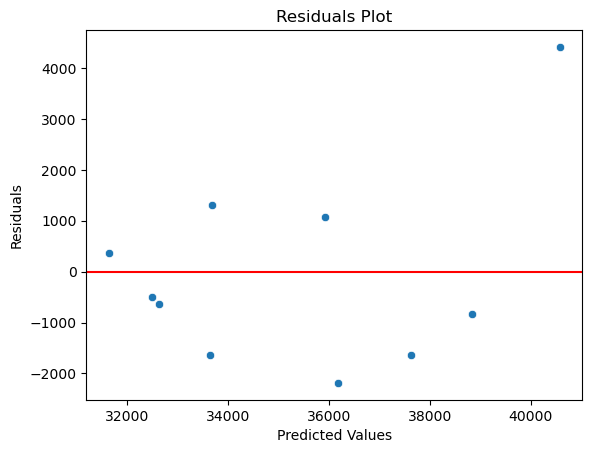

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data into a pandas dataframe
df = pd.read_csv(r'C:\Users\leegu\Desktop\LACC\Stats Data Science\Used Car Investigation Report\Used_Car_graph.csv')

# Clean the 'Price' column and convert it to a numeric format
df['Price'] = df['Price'].str.replace('$', '', regex=True).str.replace(',', '').astype(float)


# Select the features and target variable
X = df[['Mileage', 'Year']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The purpose of generating the residuals plot was to assess the effectiveness of a linear regression model in predicting the price of a used Tesla Model 3 based on its mileage and year. The dataset was comprised of a sample of 50 pre-owned Tesla Model 3’s, each priced and listed with its mileage, year, type, and color. 

The residual plot gives us an idea of how reliable the predicted prices are using the zero line as a reference. If a point is close to the zero line, then the predicted price is similar to the actual price and the further away it is, the further the estimate price is. A reliable model would show the data points randomly dispersed around the zero line, as shown in the residual plot above, based on our own dataset. Any discernible patterns in a residual plot would suggest that the model is not capturing all the necessary information about the data. 

We can further visualize the residual in different ways below: 




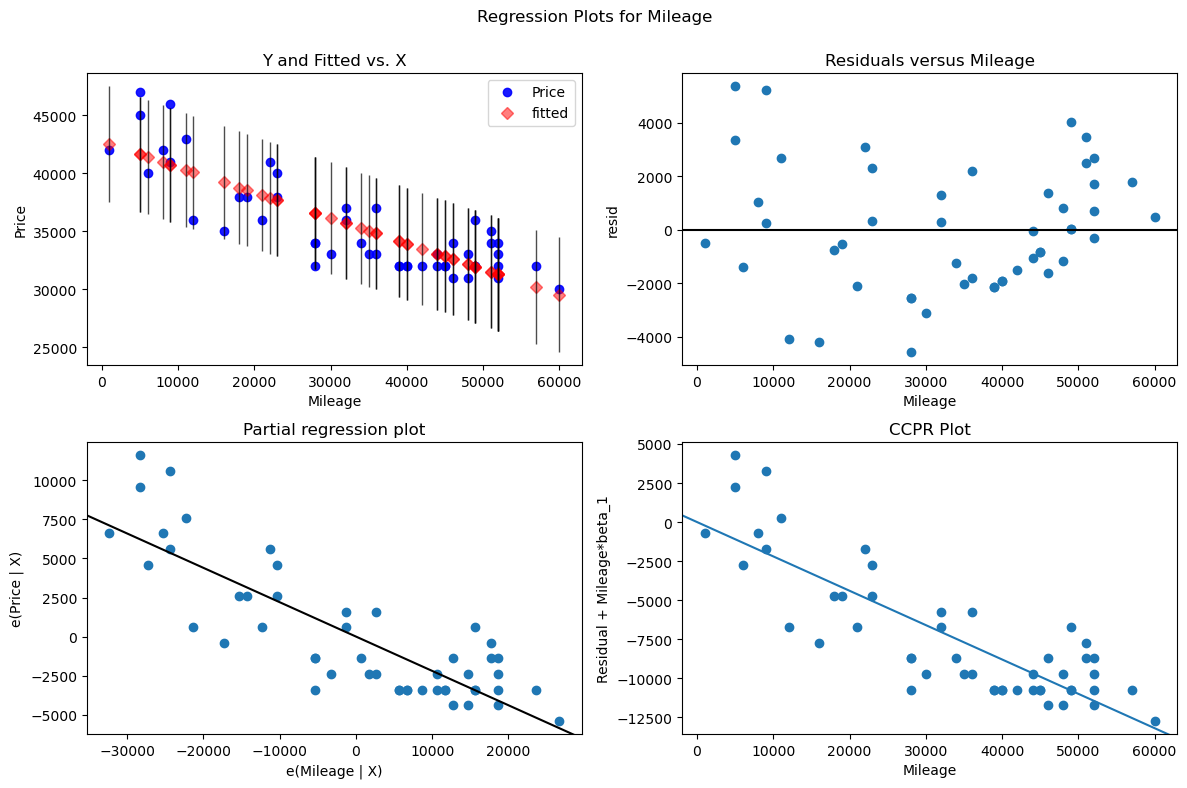

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset into a pandas dataframe
df = pd.read_csv(r'C:\Users\leegu\Desktop\LACC\Stats Data Science\Used Car Investigation Report\Used_Car_graph.csv')

# Clean the 'Price' column to remove "$" and ","
df['Price'] = df['Price'].str.replace('$', '', regex=True).str.replace(',', '').astype(float)

# Fit a linear regression model to predict price from mileage
X = sm.add_constant(df['Mileage'])  # Add a constant term to the model
y = df['Price'].astype(float)  # Convert 'Price' to float

# Create and fit a linear regression model
model = sm.OLS(y, X).fit()

# Plot the residual plot
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, 'Mileage', fig=fig)
plt.show()

To sum it all up, the residual plot is a diagnostic tool in assessing the effectiveness of a linear regression model, capturing underlying patterns and relationships within the data, as well as checking to see if the model is capturing all the information that we need about data. In this particular investigation, we can see that the residual plot does indicate that the linear regression model is effective and giving us reliable estimates. 

**Conclusion and Discussion**

Going back to the original research question stated at the beginning of this investigation, can statistics and data science be used to predict the price of a used Tesla car? The answer is yes, this can be done using a linear regression model. By organizing the data of Tesla vehicles according to mileage and price, we can create a linear equation that will give us a reasonable price estimate of a used Tesla. 

The statistical model that we created in this investigation can be summarized by this linear equation: 

price = -0.22(mileage) + 42727.82

Furthermore, we comptued many values that test the reliability of this equation.

The R2 value of 0.70 further strengthens the effectiveness of our linear model. According to this coefficient of determination value, 70% of the variability in our response variable can be explained by our explanatory variable. A value of 0.70 is close to 1 than it is to 0, so this is a strong value. 

In our investigation, we used a linear model to predict the prices of used Tesla cars based on mileage. The fact that an analysis of the data displayed a clear linear pattern and that the correlation of coefficient was reasonably high, it is safe to say that a linear model is an appropriate approach in predicting the price of the used Tesla cars. In addition, the residual plot generated shows that the data points are randomly scattered around the zero line, further strengthening our linear model. 
	
Based on everything we have gathered, one can claim a causal relationship between the explanatory variable (mileage) and response variable (price), to a certain extent. In general, the higher the mileage of a car, the lower its price will be. This makes sense because the more miles a car has, the more usage and wear and tear the car has experienced, so it makes sense that the car would decrease in value. However, we must acknowledge that the possibility of confounding and lurking variables that this study did not account for. There are much more factors that can affect the price of a used car than just mileage alone. Variables such as number of owners, condition, accident history, personalization, etc. are all some of many factors that can affect the price of a used car. 
	
Nonetheless, the linear model in the investigation reasonably fulfills its purpose in predicting the price of a used car based on mileage. This model is based on a sample of 50 randomly chosen used Tesla Model 3’s and we have enough evidence of the reliability of this model for it to be applied to the general population of used Tesla Model 3 vehicles in the automotive market today. 

In closing, the linear model created in this research is reliable, but there are definitely ways for it to be improved. If I were to conduct this research again, I would try to account for the confounding variables that were not accounted for. Specifically, I would seek to incorporate the accident history and the number of previous owners of the vehicles into the explanatory variables, along with mileage. Condition is an essential factor to take account for when buying a used car, and these are big factors that contributed to a car’s current condition. 
